In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# import zipfile

# # Unzip the archive into the "datasets" folder
# local_zip = './merged-datasets.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall()
# zip_ref.close()

In [2]:
# Directory Management for Image datasets
data_dir_image = 'datasets/image'
data_dir_image = pathlib.Path(data_dir_image)
durian_images_dict = {
    'ripe' : list(data_dir_image.glob('ripe/*')),
    'unripe' : list(data_dir_image.glob('unripe/*')),
} 
durian_labels_dict = {
    'ripe' : 0,
    'unripe' : 1
}

In [3]:
# Directory Management for Raw Image datasets
data_dir_raw_image = 'datasets/raw image'
data_dir_raw_image = pathlib.Path(data_dir_raw_image)
raw_durian_images_dict = {
    'ripe' : list(data_dir_raw_image.glob('ripe/*')),
    'unripe' : list(data_dir_raw_image.glob('unripe/*')),
} 
raw_durian_labels_dict = {
    'ripe' : 0,
    'unripe' : 1
}

In [4]:
# Directory Management for Gas datasets
data_dir_gas = 'datasets/gas'
data_dir_gas = pathlib.Path(data_dir_gas)
durian_gas_dict = {
    'ripe' : list(data_dir_gas.glob('ripe/*')),
    'unripe' : list(data_dir_gas.glob('unripe/*')),
} 
gas_labels_dict = {
    'ripe' : 0,
    'unripe' : 1
}
list(data_dir_gas.glob('*/*.png'))[:5]

[WindowsPath('datasets/gas/ripe/heatmap_10_percobaan_1.png'),
 WindowsPath('datasets/gas/ripe/heatmap_10_percobaan_2 - Copy.png'),
 WindowsPath('datasets/gas/ripe/heatmap_10_percobaan_2.png'),
 WindowsPath('datasets/gas/ripe/heatmap_10_percobaan_3.png'),
 WindowsPath('datasets/gas/ripe/heatmap_10_percobaan_4.png')]

In [5]:
X_image, y_image = [], []
for durian_ripeness, images in durian_images_dict.items():
    for index, image in enumerate(images):
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X_image.append(resized_img)
        y_image.append(durian_labels_dict[durian_ripeness])
X_image = np.array(X_image)
y_image = np.array(y_image)
y_image

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
X_raw, y_raw = [], []
output_folder = "resized_images"
for durian_ripeness, images in raw_durian_images_dict.items():
    for index, image in enumerate(images):
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X_raw.append(resized_img)
        y_raw.append(raw_durian_labels_dict[durian_ripeness])
        # Uncomment if you want to check all the resized images
        # output_name = f"{durian_ripeness}_{index}.jpg"
        # output_path = os.path.join(output_folder, output_name)
        # cv2.imwrite(output_path, resized_img)
X_raw = np.array(X_raw)
y_raw = np.array(y_raw)
y_raw

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
X_gas, y_gas = [], []
for durian_ripeness, images in durian_gas_dict.items():
    for index, image in enumerate(images):
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X_gas.append(resized_img)
        y_gas.append(gas_labels_dict[durian_ripeness])
X_gas = np.array(X_gas)
y_gas = np.array(y_gas)
y_gas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
from sklearn.model_selection import train_test_split
X_train_image, X_test_image, y_train_image, y_test_image = train_test_split(X_image, y_image, train_size=0.6)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, train_size=0.6)
X_train_gas, X_test_gas, y_train_gas, y_test_gas = train_test_split(X_gas, y_gas, train_size=0.6)
# Scaling Image dataset
X_train_scaled_image = X_train_image /255
X_test_scaled_image = X_test_image /255
# Scaling Raw dataset
X_train_scaled_raw = X_train_raw /255
X_test_scaled_raw = X_test_raw /255
# Scaling Gas dataset
X_train_scaled_gas = X_train_gas /255
X_test_scaled_gas = X_test_gas /255

In [9]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, concatenate
from tensorflow.keras.models import Model

input_shape_image = (200, 200, 3)  
input_shape_raw = (200, 200, 3)  
input_shape_gas = (200, 200, 3)  


# Define two separate input layers
input_image = Input(shape=input_shape_image)
input_raw = Input(shape=input_shape_raw)
input_gas = Input(shape=input_shape_gas)

In [10]:
convDim = 5  # Define the convolution dimension

In [11]:
# Convolution layer for Image dataset
conv1_image = Conv2D(64, (convDim, convDim), activation='relu', input_shape=input_shape_image)(input_image)
pool1_image = MaxPooling2D(2, 2)(conv1_image)
drop1_image = Dropout(0.25)(pool1_image)

conv2_image = Conv2D(128, (convDim, convDim), activation='relu')(drop1_image)
pool2_image = MaxPooling2D(2, 2)(conv2_image)
drop2_image = Dropout(0.25)(pool2_image)

flat_image = Flatten()(drop2_image)

c:\Users\induction motor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
# Convolution layer for Raw dataset
conv1_raw = Conv2D(64, (convDim, convDim), activation='relu', input_shape=input_shape_raw)(input_raw)
pool1_raw = MaxPooling2D(2, 2)(conv1_raw)
drop1_raw = Dropout(0.25)(pool1_raw)

conv2_raw = Conv2D(128, (convDim, convDim), activation='relu')(drop1_raw)
pool2_raw = MaxPooling2D(2, 2)(conv2_raw)
drop2_raw = Dropout(0.25)(pool2_raw)

flat_raw = Flatten()(drop2_raw)

In [13]:
# Convolution layer for Gas dataset
conv1_gas = Conv2D(64, (convDim, convDim), activation='relu', input_shape=input_shape_gas)(input_gas)
pool1_gas = MaxPooling2D(2, 2)(conv1_gas)
drop1_gas = Dropout(0.25)(pool1_gas)

conv2_gas = Conv2D(128, (convDim, convDim), activation='relu')(drop1_gas)
pool2_gas = MaxPooling2D(2, 2)(conv2_gas)
drop2_gas = Dropout(0.25)(pool2_gas)

flat_gas = Flatten()(drop2_gas)

In [14]:
# Concatenate the flattened outputs
merged = concatenate([flat_image, flat_raw, flat_gas])

In [15]:
# Fully Connected Layer
fc2 = Dense(128, activation='relu')(merged)
drop_fc2 = Dropout(0.5)(fc2)
output = Dense(1, activation='sigmoid')(drop_fc2)

# Create the model
model = Model(inputs=[input_image, input_raw, input_gas], outputs=output)

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)
from tensorflow.keras.utils import plot_model

# Print model summary
# model.summary()
plot_model(model, to_file='custom-cnn.png', show_shapes=False, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check the loss
    if(logs.get('accuracy') == 1.0):

      # Stop if threshold is met
      print("\nAccuracy is reached than 1.0 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()
# callbacks=callbacks

In [18]:
# Train the model
model_fit = model.fit(
 (X_train_scaled_image, X_train_scaled_raw, X_train_scaled_gas), 
 y_train_image, 
 batch_size=3, 
 epochs=25,
 validation_data=(
        (X_test_scaled_image, X_test_scaled_raw, X_test_scaled_gas), 
        (y_test_image, y_test_raw, y_test_gas)
    ),
#  callbacks=callbacks
 )

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4600 - loss: 6.6828 - val_accuracy: 0.4750 - val_loss: 0.6665
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5685 - loss: 0.6130 - val_accuracy: 0.5000 - val_loss: 0.5794
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5710 - loss: 0.5023 - val_accuracy: 0.5250 - val_loss: 0.5324
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8656 - loss: 0.2719 - val_accuracy: 0.5750 - val_loss: 1.0200
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9080 - loss: 0.2552 - val_accuracy: 0.8000 - val_loss: 0.3423
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0593 - val_accuracy: 0.8250 - val_loss: 0.4286
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0217 - val_accuracy: 0.8250 - val_loss: 0.3977
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9659 - loss: 0.1185 - val_accuracy: 0.7250 - val_loss:

In [24]:
loss, accuracy = model.evaluate([X_test_scaled_image, X_test_scaled_raw, X_test_scaled_gas], [y_test_image, y_test_raw, y_test_gas])
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 574ms/step - accuracy: 0.8104 - loss: 0.5897
Test Loss: 0.4621782898902893
Test Accuracy: 0.824999988079071


In [25]:
predictions = model.predict([X_test_scaled_image, X_test_scaled_raw, X_test_scaled_gas])
predictions = np.round(predictions,2)
predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 518ms/step


array([[0.  ],
       [0.99],
       [0.  ],
       [1.  ],
       [0.94],
       [0.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.85],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.06],
       [0.  ],
       [0.99],
       [1.  ],
       [0.9 ],
       [0.99],
       [0.94],
       [1.  ],
       [1.  ],
       [0.45],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.98],
       [1.  ],
       [0.02],
       [0.55],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.2 ],
       [1.  ],
       [0.34],
       [1.  ],
       [1.  ],
       [0.  ]], dtype=float32)

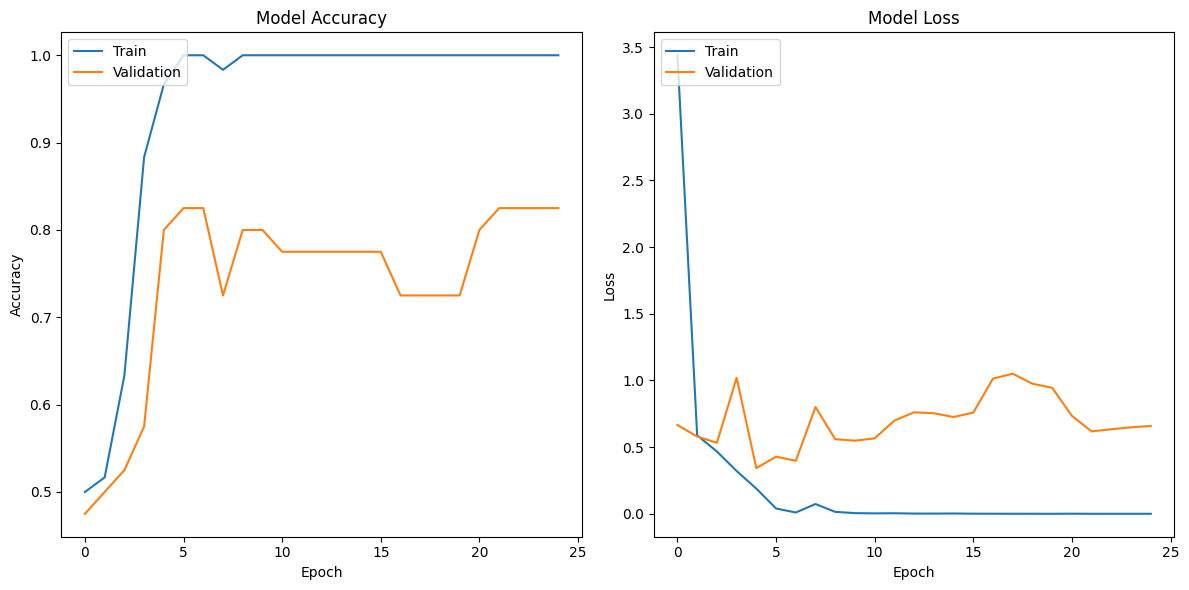

In [26]:
# Plot training and validation history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])  # Add validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])  # Add validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 494ms/step


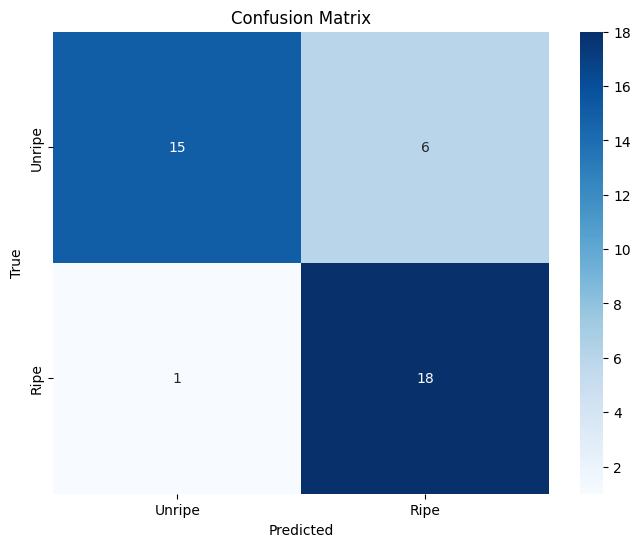

In [27]:
# Generate predictions on the test set
y_pred = model.predict([X_test_scaled_image, X_test_scaled_raw, X_test_scaled_gas])
y_pred_classes = (y_pred > 0.9).astype(int)  # Assuming it's a binary classification problem

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test_image, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
# model.save('3MergedInput-CNN-Conv3.h5')

In [29]:
# from tensorflow.keras.preprocessing import image 

# # %%
# # Preprocess and Predict Image data
# test_image_path = "predictions/image/ripe_9.jpg"
# # test_image_path = "predictions/image/unripe_16.jpg"
# img = image.load_img(test_image_path)
# # plt.imshow(img)

# # %%
# # Preprocess and Predict Gas data
# test_gas_path = "predictions/gas/ripe_13.jpg"
# # test_gas_path = "predictions/gas/unripe_25.jpg"
# img_gas= image.load_img(test_gas_path)
# # plt.imshow(img_gas)

# # %%
# X_image = image.img_to_array(img)
# X_image = np.expand_dims(X_image, axis=0)
# X_image = X_image / 255

# X_gas = image.img_to_array(img_gas)
# X_gas = np.expand_dims(X_gas, axis=0)
# X_gas = X_gas / 255

# # %%
# predict = model.predict([X_image, X_gas])
# p = predict[0][0]
# p = '{:.10f}'.format(p)
# p